In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.pyplot import cm

import torch
import gpytorch
from sklearn import preprocessing
from scipy.signal import find_peaks



In [549]:
max_times = []

In [1580]:
lightcurve = pd.read_csv('SN2023mpz_frg_r.csv')#.dropna()

In [1581]:
display(lightcurve)

,Unnamed: 0,MJD,filter,unforced_mag,unforced_mag_error,unforced_mag_status,forced_ujy,forced_ujy_error
0,0,60285.133507,r,19.721,0.189,positive,NaN,NaN
1,2,60268.133310,r,19.771,0.271,positive,46.1,5.6
2,5,60260.109572,r,19.719,0.184,positive,45.6,5.2
3,8,60255.145833,r,19.723,0.161,positive,46.4,3.5
4,11,60253.144595,r,19.689,0.172,positive,49.1,3.6
5,12,60251.184711,r,19.653,0.151,positive,50.3,4.3
6,19,60245.161840,r,19.681,0.208,positive,46.4,6.2
7,21,60239.222697,r,19.642,0.173,positive,50.5,3.9
8,24,60237.183565,r,19.621,0.129,positive,53.5,3.9
9,26,60235.139028,r,19.504,0.111,positive,57.7,3.0


In [1582]:
for i in range(10):
    idx = np.random.choice(lightcurve.index)
    lightcurve = lightcurve.drop(idx)

display(lightcurve)

,Unnamed: 0,MJD,filter,unforced_mag,unforced_mag_error,unforced_mag_status,forced_ujy,forced_ujy_error
0,0,60285.133507,r,19.721,0.189,positive,NaN,NaN
1,2,60268.133310,r,19.771,0.271,positive,46.1,5.6
3,8,60255.145833,r,19.723,0.161,positive,46.4,3.5
4,11,60253.144595,r,19.689,0.172,positive,49.1,3.6
7,21,60239.222697,r,19.642,0.173,positive,50.5,3.9
8,24,60237.183565,r,19.621,0.129,positive,53.5,3.9
9,26,60235.139028,r,19.504,0.111,positive,57.7,3.0
10,28,60233.153368,r,19.471,0.113,positive,60.2,3.1
11,30,60231.158171,r,19.450,0.126,positive,59.4,3.3
12,32,60228.162026,r,19.177,0.120,positive,71.7,4.8


In [1583]:
filter_colors = list(pd.unique(lightcurve['filter']))

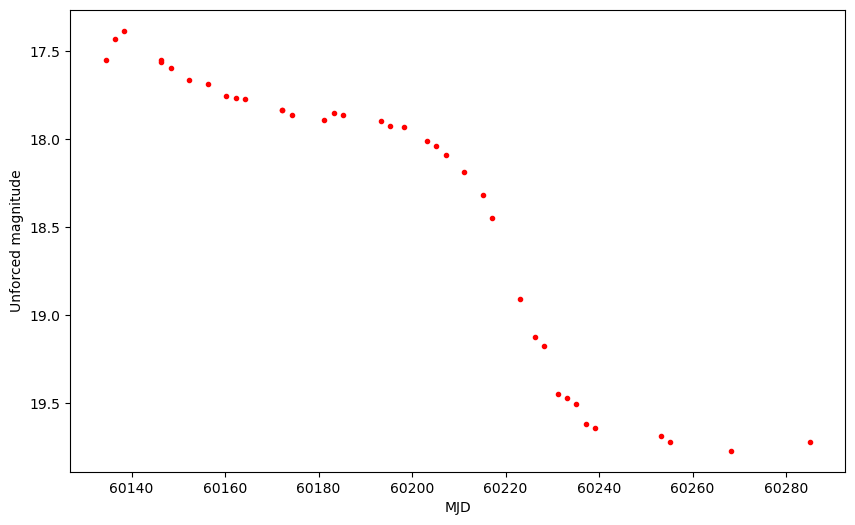

In [1584]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
plt.gca().invert_yaxis()
ax.set_xlabel('MJD')
ax.set_ylabel('Unforced magnitude')

for color in filter_colors:
    lightcurve_color=lightcurve[lightcurve['filter']==color]
    plt.scatter(lightcurve_color['MJD'],lightcurve_color['unforced_mag'],marker='.',color=color)

In [1585]:
torch.set_default_dtype(torch.float64)

In [1586]:
class MultitaskGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(MultitaskGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel()
            )
        
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)   

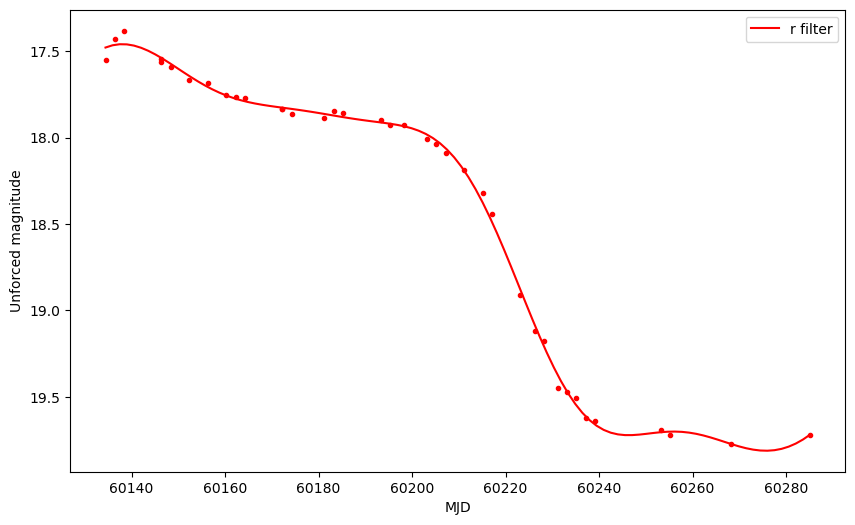

In [1587]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
plt.gca().invert_yaxis()
ax.set_xlabel('MJD')
ax.set_ylabel('Unforced magnitude')


for color in filter_colors:
    lightcurve_color=lightcurve[lightcurve['filter']==color]
    scaler = preprocessing.StandardScaler().fit(lightcurve_color['unforced_mag'].values.reshape(-1,1))
    scaled = scaler.transform(lightcurve_color['unforced_mag'].values.reshape(-1,1)).flatten()

    train_x = torch.from_numpy(lightcurve_color['MJD'].values).to(torch.float64)
    train_y = torch.from_numpy(scaled).to(torch.float64)

    X = np.linspace(lightcurve_color['MJD'].values[0],lightcurve_color['MJD'].values[-1],100)
    test_x = torch.from_numpy(X).to(torch.float64)

    likelihood = gpytorch.likelihoods.GaussianLikelihood(num_tasks=2)
    model = MultitaskGPModel(train_x, train_y, likelihood)
    model.train()
    likelihood.train()

    optimizer = torch.optim.Adam([{'params': model.parameters()},], lr=1)

    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    n_iter = 100
    for i in range(n_iter):
        optimizer.zero_grad()
        output = model(train_x)
        loss = -mll(output,train_y).sum()
        loss.backward()
        optimizer.step()

    model.eval()
    likelihood.eval()  

    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        predictions = likelihood(model(test_x))
        mean = predictions.mean
        lower, upper = predictions.confidence_region()

    fitted = scaler.inverse_transform(mean.numpy().reshape(-1,1)).flatten() #.reshape(len(X),-1)
    ax.plot(X,fitted,color=color,label=color+' filter')
    plt.scatter(lightcurve_color['MJD'],lightcurve_color['unforced_mag'],marker='.',color=color)
ax.legend()

In [1588]:
max = min(fitted)
max_idx = np.where(fitted == max)
max_time = X[max_idx]
print(max_time)
print(filter_colors)
max_times.append(max_time)
print(max_times)
print(len(max_times))

[60137.4667014]
['r']
[array([60136.401227]), array([60138.98903961]), array([60138.98903961]), array([60138.98903961]), array([60138.98903961]), array([60138.98903961]), array([60138.98903961]), array([60138.98903961]), array([60138.98903961]), array([60136.401227]), array([60138.4525]), array([60138.98903961]), array([60138.98903961]), array([60136.401227]), array([60138.98903961]), array([60138.4525]), array([60139.82450116]), array([60138.98903961]), array([60138.98903961]), array([60138.98903961]), array([60138.98903961]), array([60138.98903961]), array([60138.4525]), array([60138.4525]), array([60136.401227]), array([60138.98903961]), array([60144.308264]), array([60138.98903961]), array([60138.98903961]), array([60136.401227]), array([60138.98903961]), array([60138.98903961]), array([60139.82450116]), array([60138.98903961]), array([60138.98903961]), array([60136.401227]), array([60138.98903961]), array([60138.47388212]), array([60140.51137781]), array([60138.4525]), array([6013

In [1589]:
time_avg = np.mean(max_times)
time_std = np.std(max_times)
print(time_avg,time_std)

60138.59935472303 1.302936538821068
